# CISC 351/372 Advanced Data Analytics Group Project

## Group 8: Political Sentiment Analysis In Liberal and Conservative Reddit Communities

### RQ3: How does the use of hyperbolic language differ between liberal and conservative Reddit communities? 

This notebook contains the code to answer the third research question.

### Imports

In [ ]:
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd

import nltk
nltk.download('punkt')

import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Prepare Dataset

In [3]:
with open("Conservative.json", "r") as file:
    con_data = json.load(file)

with open("Liberal.json", "r") as file:
    lib_data = json.load(file)

# Convert JSON to a DataFrame
con_df = pd.DataFrame(con_data)
lib_df = pd.DataFrame(lib_data)

# Check the structure
print(con_df.head())
print(lib_df.head())

   WordCount                                            article  \
0       1101  Retired US Army General Wesley Clark called fo...   
1       1312  If a place isn't too far gone to start with, t...   
2        550  On Palm Sunday, the Trust Women Wichita aborti...   
3        762  CARACAS, Venezuela (AP) — A leading Venezuelan...   
4        311  It’s been less than a month since Trump – afte...   

  author_flair_text  created_utc               domain  num_comments  score  \
0                     1437509071             wsws.org             3     18   
1                     1620141553  americanthinker.com            18    313   
2                     1586381822       liveaction.org             0      1   
3                     1399316632       news.yahoo.com             0      7   
4                     1473095574         redstate.com            10     17   

                                                 url       url_domain  \
0  http://www.wsws.org/en/articles/2015/07/21/cla...   

### Hyperbolic Analysis

In [ ]:
# Define custom hyperbole lexicon
custom_hyperbole_lexicon = set([
    "absolutely", "completely", "totally", "utterly", "extremely", "insanely", "incredibly",
    "ridiculously", "unbelievably", "outrageously", "massively", "intensely", "tremendously",
    "overwhelmingly", "beyond", "literally",

    "amazing", "disgusting", "horrifying", "devastating", "glorious", "catastrophic", "unbelievable",
    "outrageous", "ridiculous", "perfect", "pathetic", "flawless", "disastrous", "absurd",
    "horrible", "insane", "genius", "monstrous",

    "best", "worst", "greatest", "biggest", "most", "least", "highest", "lowest", "ultimate",
    "never", "always", "forever", "all", "none", "every", "no one", "nothing", "everyone", "everything"
])

# Function to count hyperbolic words and normalize
def get_hyperbole_ratio(text):
    try:
        words = text.lower().split()
        word_count = len(words)
        if word_count == 0:
            return 0.0
        hyperbole_count = sum(1 for word in words if word in custom_hyperbole_lexicon)
        return hyperbole_count / word_count
    except:
        return 0.0

# Convert articles to list
con_articles = con_df['article'].tolist()
lib_articles = lib_df['article'].tolist()

# Multiprocessing
NUM_CORES = -1  # Use all available cores

# Conservative
con_ratios = Parallel(n_jobs=NUM_CORES)(
    delayed(get_hyperbole_ratio)(text) for text in tqdm(con_articles, desc="Processing Conservative")
)

# Liberal
lib_ratios = Parallel(n_jobs=NUM_CORES)(
    delayed(get_hyperbole_ratio)(text) for text in tqdm(lib_articles, desc="Processing Liberal")
)

# Store back in the DataFrame
con_df['hyperbole_ratio'] = con_ratios
lib_df['hyperbole_ratio'] = lib_ratios

# Print average ratios
print("Average hyperbole ratio (Conservative):", con_df['hyperbole_ratio'].mean())
print("Average hyperbole ratio (Liberal):", lib_df['hyperbole_ratio'].mean())



Processing Liberal: 100%|██████████| 72488/72488 [00:06<00:00, 11200.57it/s]


Average hyperbole ratio (Conservative): 0.007222175842296374
Average hyperbole ratio (Liberal): 0.006699233366096231


### t - test

In [ ]:
t_stat, p_val = ttest_ind(con_df['hyperbole_ratio'], lib_df['hyperbole_ratio'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


T-statistic: 22.8763, P-value: 0.0000


### Plot Results

C:\Users\krist\AppData\Local\Temp\ipykernel_28904\2714827328.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='group', y='hyperbole_ratio', data=combined_df, palette=['#FF6347', '#4682B4'], cut=0)


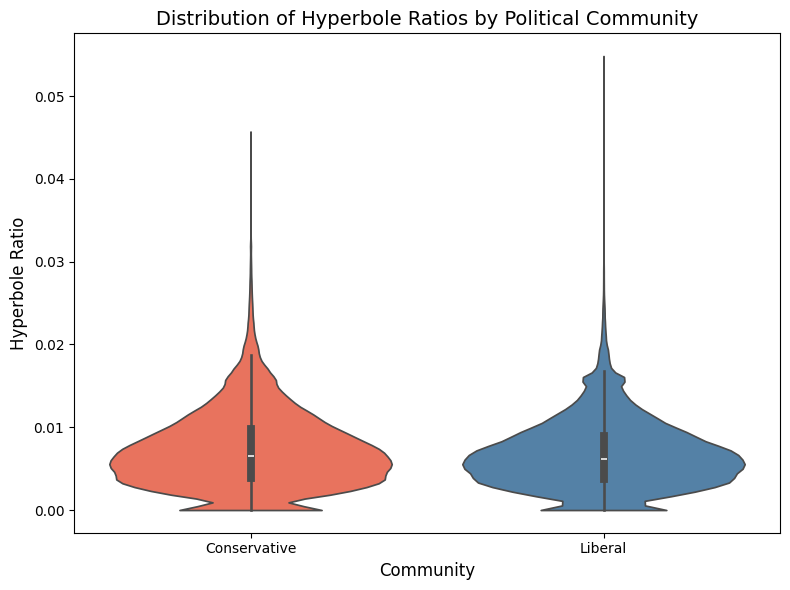

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='hyperbole_ratio', data=combined_df, palette=['#FF6347', '#4682B4'], cut=0)

plt.title('Distribution of Hyperbole Ratios by Political Community', fontsize=14)
plt.xlabel('Community', fontsize=12)
plt.ylabel('Hyperbole Ratio', fontsize=12)

plt.tight_layout()
plt.show()



### Results Interpretation

The conservative community has a higher ratio of hyperbolic language at 0.72% compared to the Liberal community at 0.67%. The p-value is 0.00, suggesting that the difference is unlikely to be due to random chance. The violin plot indicates that both Conservative and Liberal communities tend to use low levels of hyperbole overall, with Conservatives displaying a slightly higher average. Although both distributions exhibit long upper tails, which suggest the presence of a few posts with high hyperbole use, the overall spread and shape of the distributions remain quite similar between the two groups.